In [1]:
import os

import h5py
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
sns.set_context('notebook')

import sklearn
from sklearn import datasets
from sklearn.metrics.pairwise import pairwise_kernels
import graphtools
#from pydiffmap.diffusion_map import DiffusionMap
import phate

os.chdir('..')
from diffusion_maps import compute_dm, plot_change_in_diffusion_distance, compute_diffusion_distance_direct, compute_diffusion_distance_using_dmcoords
from graph_utils import get_graph_representation, plot_graph, get_groups_from_graph

## Completely Random Data

Create random data and compute kernel.

In [2]:
np.random.seed(42)
#data, labels = phate.tree.gen_dla() # tree data
X = np.random.rand(20, 10)
K = pairwise_kernels(X, metric='rbf', gamma=2)

In [3]:
evecs_right, evals, P, d = compute_dm(K)
diffusion_coords = evecs_right@np.diag(evals)

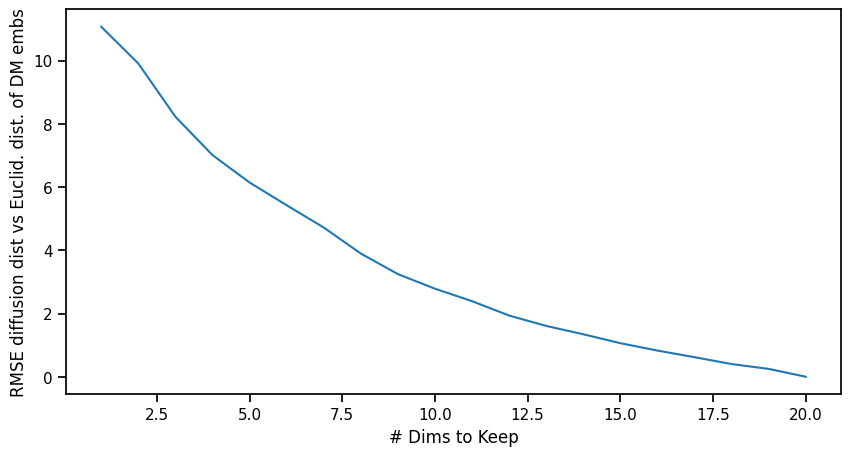

In [4]:
plot_change_in_diffusion_distance(P, d/d.sum(), diffusion_coords, 
                                  dims_to_plot=np.arange(1, len(diffusion_coords)+1))

# PHATE Tree Data

This is using the tree data from the PHATE paper

In [5]:
np.random.seed(42)
data, labels = phate.tree.gen_dla(n_branch=7) # tree data
K = pairwise_kernels(data, metric='rbf', gamma=1/1000)

evecs_right, evals, P, d = compute_dm(K)
diffusion_coords = evecs_right@np.diag(evals)

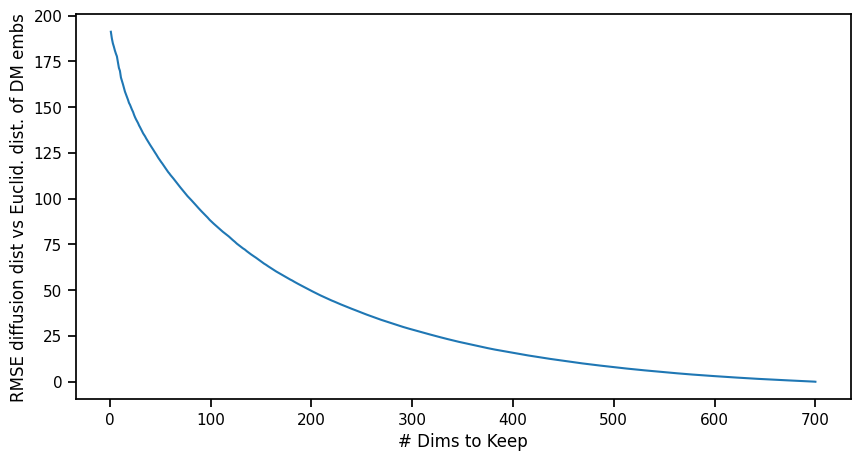

In [6]:
plot_change_in_diffusion_distance(P, d/d.sum(), diffusion_coords, 
                                  dims_to_plot=np.arange(1, len(diffusion_coords)+1))

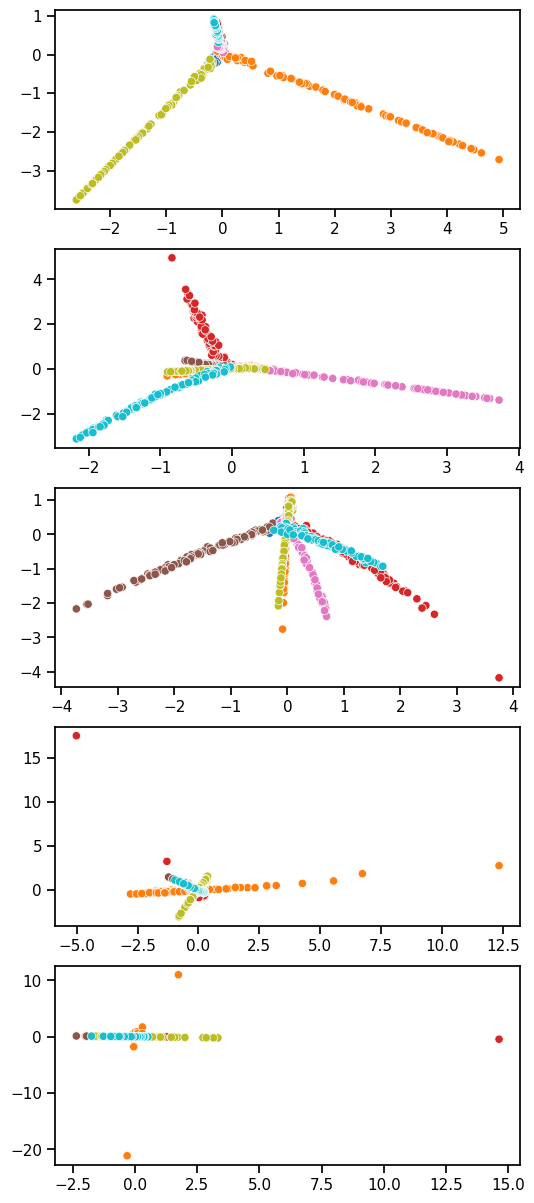

In [7]:
fig, ax = plt.subplots(nrows=5, figsize=(6, 15))
# visualization

for idx, i in enumerate(range(0,10,2)):
    sns.scatterplot(x=diffusion_coords[:,1:][:,i], 
                    y=diffusion_coords[:,1:][:,(i+1)], 
                    c=pd.Categorical(labels), 
                    cmap='tab10',
                    ax=ax[idx])

## Digits

This is using the digits dataset. It seems to have no disconnections.

In [8]:
digits = datasets.load_digits()

indices = np.arange(len(digits['target']))
data = digits['data'][indices]
targets = digits['target'][indices]

In [9]:
G = graphtools.Graph(data, decay=60, n_landmark=None)
K = G.kernel
K = np.array(K.todense())
P = G.diff_op

In [10]:
indices = get_groups_from_graph(K)
print(np.unique(indices, return_counts=True))

(array([0., 1.]), array([1770,   27]))


Look at topology

In [11]:
labels_dict = {'digit': targets}
palette = {tgt_name:color for tgt_name,color  in zip(np.unique(targets), sns.color_palette("tab10"))}
palettes = {'digit': palette}
label_orders = {'digit': np.sort(np.unique(targets))}

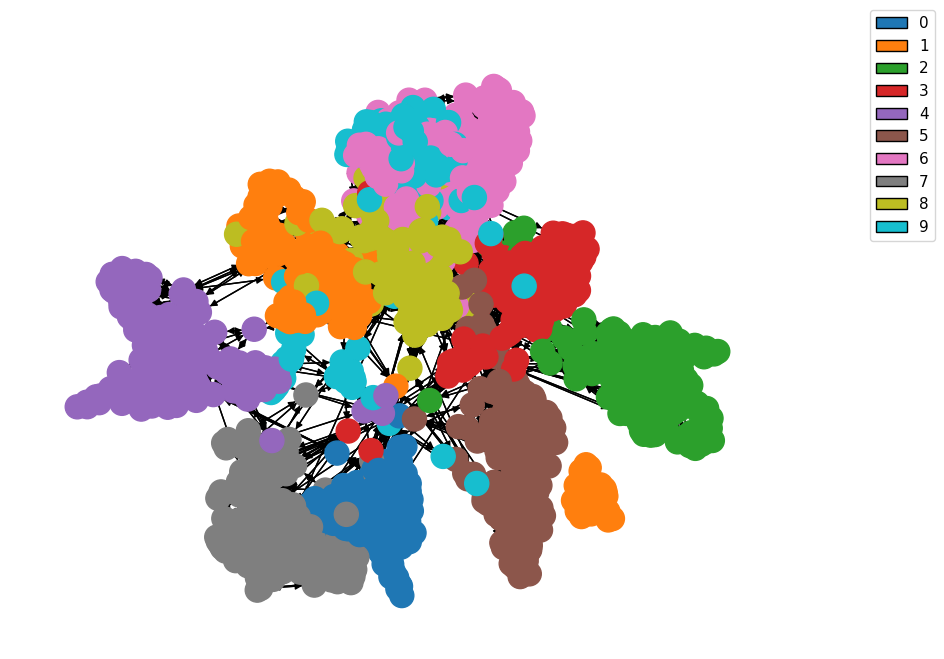

In [12]:
plot_graph(K, labels_dict, palettes, label_orders)

In [13]:
evecs_right, evals, P, d = compute_dm(K)
diffusion_coords = evecs_right@np.diag(evals)

1054 eigenvalues are negative: min=-0.6456892328581751
2 eigenvalues are 1
left evec not exactly stationary dist. Proceed with caution!
right evec not trivial (1s)! Proceed with caution!


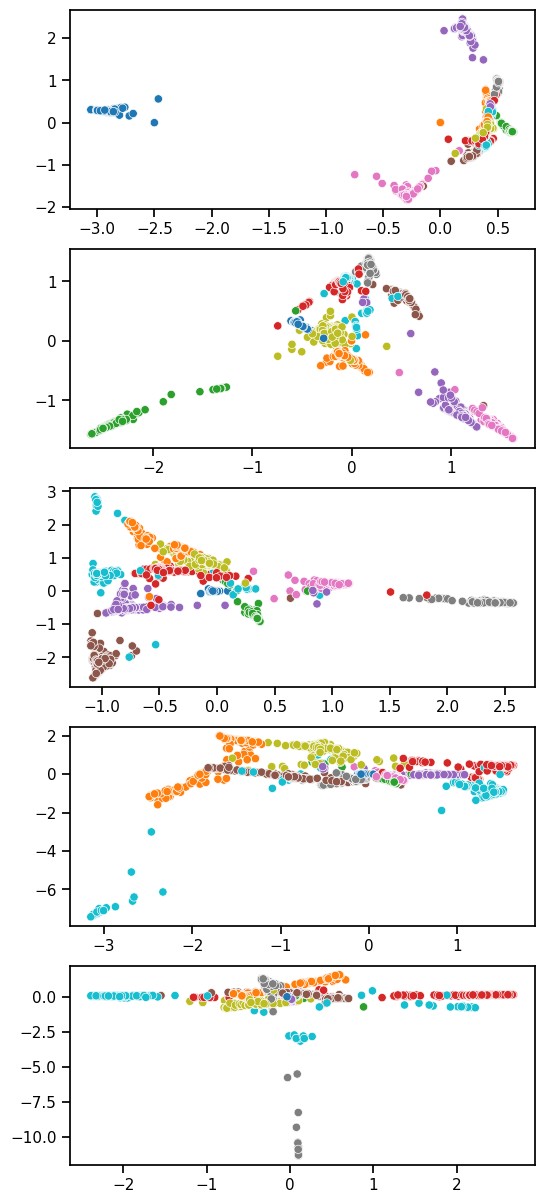

In [14]:
fig, ax = plt.subplots(nrows=5, figsize=(6, 15))
# visualization
for idx, i in enumerate(range(0,10,2)):
    sns.scatterplot(x=diffusion_coords[:,2:][:,i], 
                    y=diffusion_coords[:,2:][:,(i+1)], 
                    c=pd.Categorical(targets), 
                    cmap='tab10',
                    ax=ax[idx])